In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [45]:
df = pd.read_csv("datamhs.csv")
df.head()

,NPM,NAMA,"adil, amanah (A)",suka membantu (B),nyambung kalau ngobrol (C),"asyik, menarik (D)",SUM
0,24083010003,MARIA DWI KURNIASIH,0.7,0.9,0.9,0.8,3.3
1,24083010005,ADINDA PUTRI RACHMAWATI,0.6,0.7,0.6,0.6,2.5
2,24083010006,AQUINA SYABITA,0.8,0.9,0.7,0.8,3.2
3,24083010007,VARID PUTRA PRATAMA,0.6,0.6,0.6,0.7,2.5
4,24083010014,GAITSA NAZWA KANSA,0.8,0.9,0.9,0.9,3.5


In [46]:
nilai_cols = ["adil, amanah (A)",
              "suka membantu (B)",
              "nyambung kalau ngobrol (C)",
              "asyik, menarik (D)"]
X = df[nilai_cols].to_numpy()

In [47]:
P_raw = np.array([0.8, 0.9, 1.0, 0.8])
P = P_raw / P_raw.sum()   # normalisasi

print(P)

[0.22857143 0.25714286 0.28571429 0.22857143]


In [48]:
scores = X @ P
df["Skor"] = scores
top4 = df.nlargest(4, "Skor")[["NPM","NAMA","Skor"]]
print(top4)

            NPM                              NAMA      Skor
19  24083010057  MAULIDA APRILIA PUTRI HANDAYANI   0.977143
12  24083010044                       VIA AMANDA   0.974286
15  24083010048                ALFANI NUR AZIZAH   0.948571
5   24083010017            Mohammad Alimun Hakim   0.905714


Menunjukkan nama Mahasiswa TOP 4 dari nilai skor.

In [49]:
cov_mat  = np.cov(X, rowvar=False, ddof=1)
corr_mat = np.corrcoef(X, rowvar=False)

cov_df  = pd.DataFrame(cov_mat, index=nilai_cols, columns=nilai_cols)
corr_df = pd.DataFrame(corr_mat, index=nilai_cols, columns=nilai_cols)

print(cov_df)
print(corr_df)

                            adil, amanah (A)  suka membantu (B)  \
adil, amanah (A)                    0.013009           0.010047   
suka membantu (B)                   0.010047           0.016289   
nyambung kalau ngobrol (C)          0.008907           0.010587   
asyik, menarik (D)                  0.005816           0.008293   

                            nyambung kalau ngobrol (C)  asyik, menarik (D)  
adil, amanah (A)                              0.008907            0.005816  
suka membantu (B)                             0.010587            0.008293  
nyambung kalau ngobrol (C)                    0.018219            0.009170  
asyik, menarik (D)                            0.009170            0.010904  
                            adil, amanah (A)  suka membantu (B)  \
adil, amanah (A)                    1.000000           0.690196   
suka membantu (B)                   0.690196           1.000000   
nyambung kalau ngobrol (C)          0.578547           0.614572   
asyik, mena

In [50]:
norms = np.linalg.norm(X, axis=1, keepdims=True)
cosine_sim = (X @ X.T) / (norms @ norms.T)

cosine_df = pd.DataFrame(cosine_sim,
                         index=df["NAMA"],
                         columns=df["NAMA"])\
                             
print(cosine_df)

NAMA                                    MARIA DWI KURNIASIH   \
NAMA                                                           
MARIA DWI KURNIASIH                                 1.000000   
ADINDA PUTRI RACHMAWATI                             0.996218   
AQUINA SYABITA                                      0.991123   
VARID PUTRA PRATAMA                                 0.991405   
GAITSA NAZWA KANSA                                  0.998073   
Mohammad Alimun Hakim                               0.998610   
HIZKIA SAMHAN REZAYOSHI                             0.990778   
RAVEENA AYU DESEMBER SURYOPUTRI                     0.985119   
Yohanes Olvin Jun Sole                              0.983564   
AISYAH AMALIA HAMID                                 0.994987   
FEBRIANI YOLANDA TESSALONIKA                        0.995041   
AMELIA RIZQYNA PUTRI                                0.992180   
VIA AMANDA                                          0.991691   
FANNY WIDYA CAHYANI                     

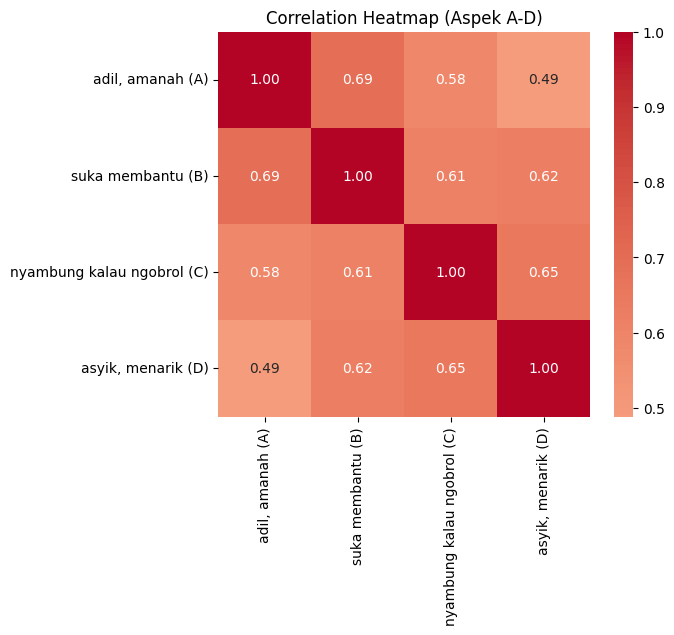

In [51]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap (Aspek A-D)")
plt.show()

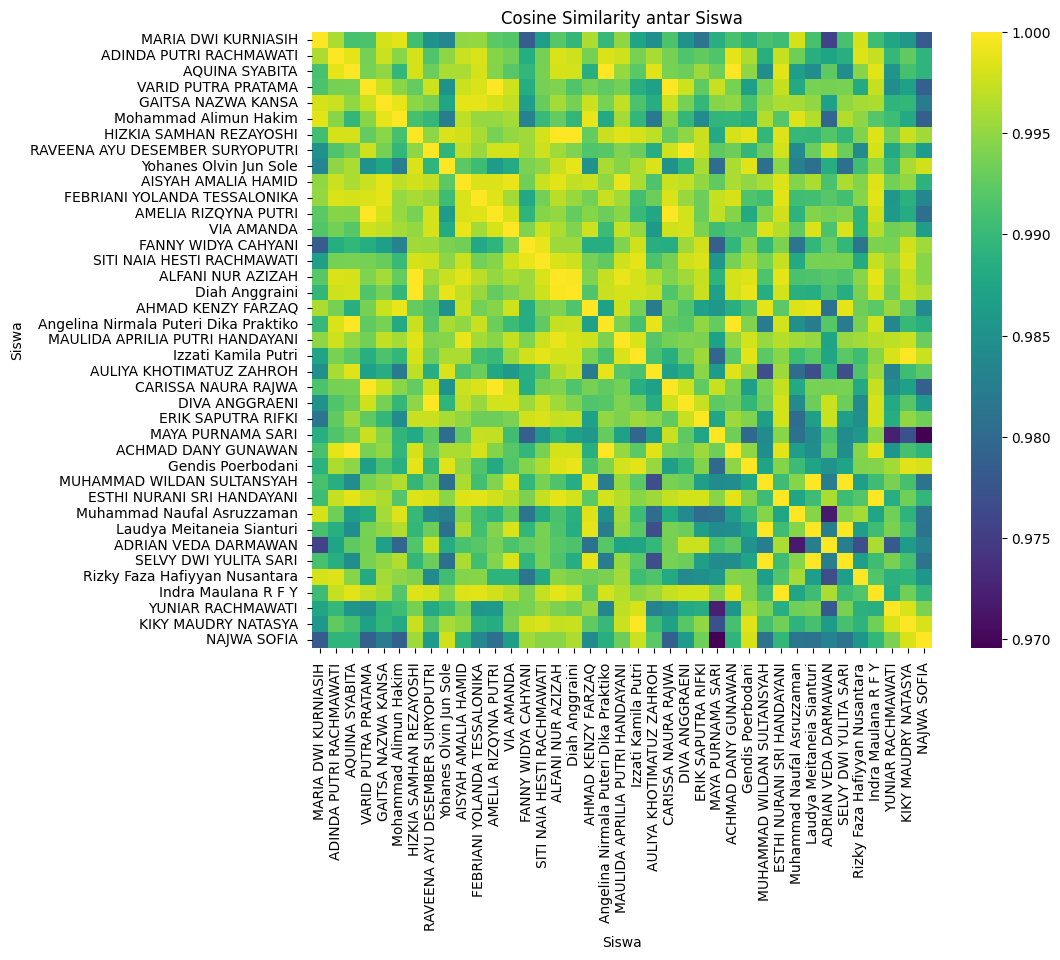

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(cosine_df, cmap="viridis")
plt.title("Cosine Similarity antar Siswa")
plt.xlabel("Siswa")
plt.ylabel("Siswa")
plt.show()